<a href="https://colab.research.google.com/github/Priyabrat845/Credit-Card-Default-Prediction-/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [68]:
#Importing all the libarary
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  roc_auc_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly.express as px
#import shap
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
dataset1=pd.read_excel('/content/drive/MyDrive/Rough works/default of credit card clients.xls')
dataset1.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [38]:
dataset=pd.read_excel('/content/drive/MyDrive/Rough works/default of credit card clients.xls',header=1)
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [39]:
dataset.rename(columns={'default payment next month':'Default payment'},inplace=True)
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [40]:
dataset.shape

(30000, 25)

In [41]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default payment'],
      dtype='object')

In [42]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               30000 non-null  int64
 1   LIMIT_BAL        30000 non-null  int64
 2   SEX              30000 non-null  int64
 3   EDUCATION        30000 non-null  int64
 4   MARRIAGE         30000 non-null  int64
 5   AGE              30000 non-null  int64
 6   PAY_0            30000 non-null  int64
 7   PAY_2            30000 non-null  int64
 8   PAY_3            30000 non-null  int64
 9   PAY_4            30000 non-null  int64
 10  PAY_5            30000 non-null  int64
 11  PAY_6            30000 non-null  int64
 12  BILL_AMT1        30000 non-null  int64
 13  BILL_AMT2        30000 non-null  int64
 14  BILL_AMT3        30000 non-null  int64
 15  BILL_AMT4        30000 non-null  int64
 16  BILL_AMT5        30000 non-null  int64
 17  BILL_AMT6        30000 non-null  int64
 18  PAY_AM

In [ ]:
dataset.isna().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
Default payment    0
dtype: int64

From the above we can see that there is no NULL values to remove.

In [6]:
dataset['Default payment'].value_counts()

0    23364
1     6636
Name: Default payment, dtype: int64

In [ ]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [7]:
dataset['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

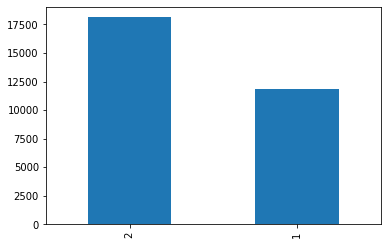

In [8]:
dataset['SEX'].value_counts().plot.bar()

In [9]:
dataset['SEX']= dataset['SEX'].replace({1:0,2:1})
dataset['SEX'].value_counts()

1    18112
0    11888
Name: SEX, dtype: int64

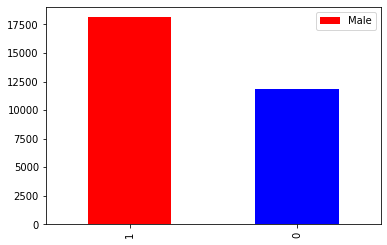

In [10]:
dataset['SEX'].value_counts().plot.bar(color=['red','blue'])
Gender=["Male","Female"]
plt.legend(Gender)

In [11]:
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

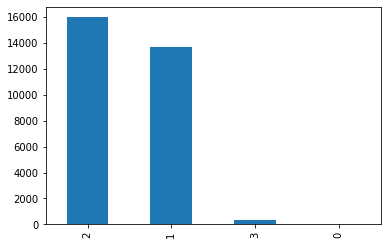

In [12]:
dataset['MARRIAGE'].value_counts().plot.bar()

In [13]:
dataset['AGE'].value_counts().sort_index()

21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: AGE, dtype: int64

As more than 1000 users belong to the 21-23 age range, so we are considering them as unmarried for the simplicity.

In [44]:
dataset['MARRIAGE']= dataset['MARRIAGE'].replace({3:1,2:1,1:0})
dataset['MARRIAGE'].value_counts()

1    16287
0    13713
Name: MARRIAGE, dtype: int64

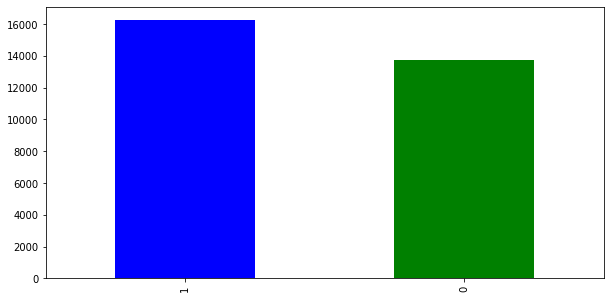

In [45]:
dataset['MARRIAGE'].value_counts().plot.bar(color=['blue','green'])

In [16]:
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [46]:
#Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
dataset['EDUCATION']= dataset['EDUCATION'].replace({1:0,2:1,3:2,4:2,5:2,6:2})
dataset['EDUCATION'].value_counts()

1    14030
0    10599
2     5371
Name: EDUCATION, dtype: int64

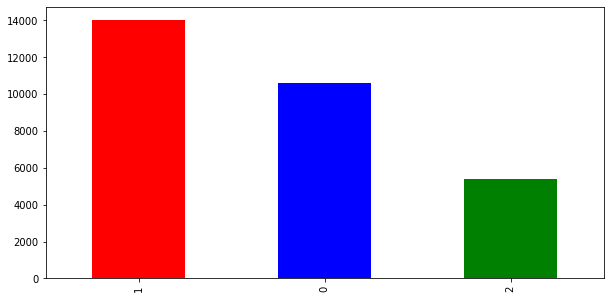

In [47]:
dataset['EDUCATION'].value_counts().plot.bar(color=['red','blue','green'])

In [48]:
dataset['Default payment'].value_counts()

0    23364
1     6636
Name: Default payment, dtype: int64

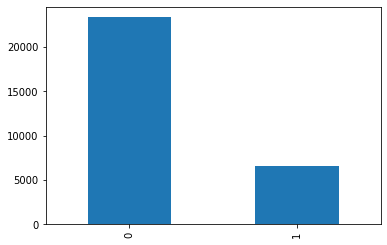

In [ ]:
dataset['Default payment'].value_counts().plot.bar()

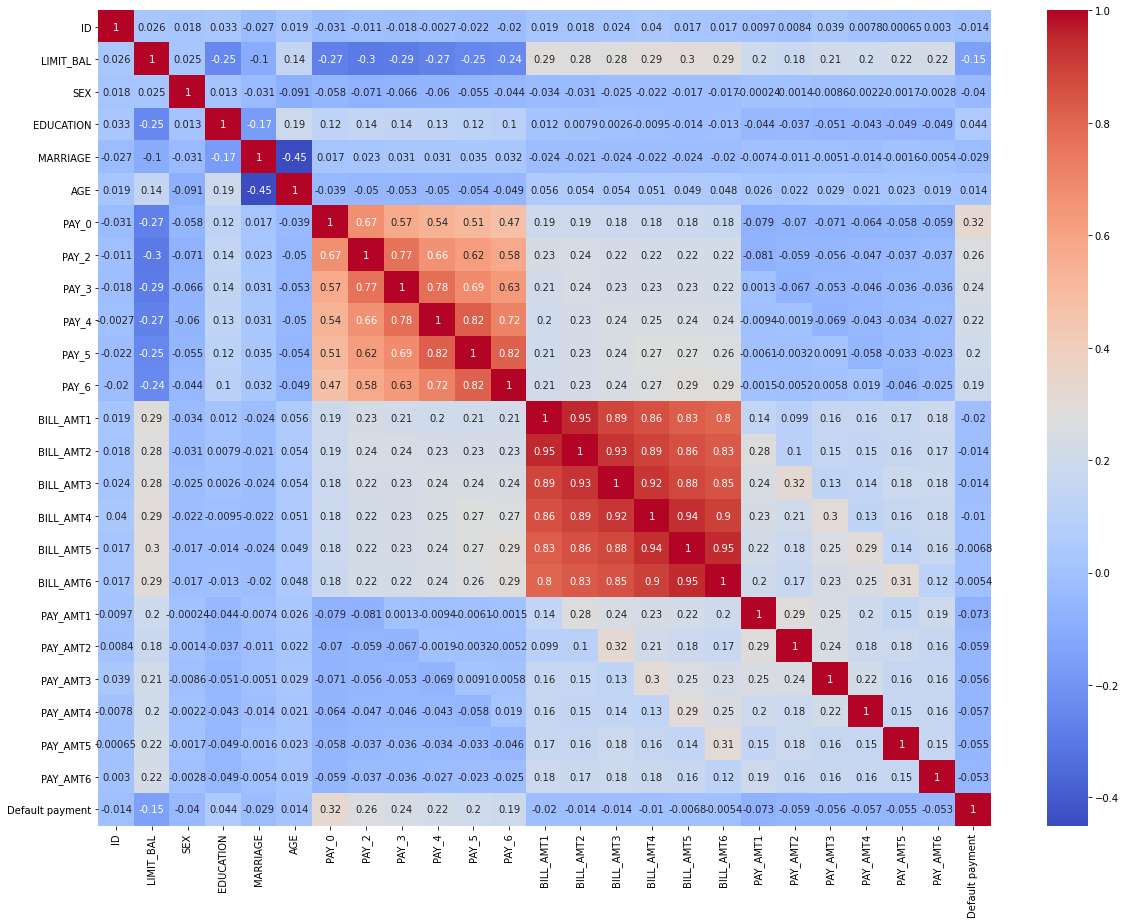

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True,cmap="coolwarm")

In [ ]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment
0,1,20000,1,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,1,2,1,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,1,2,1,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [49]:
dataset['Pending bill']=(dataset['BILL_AMT1']+dataset['BILL_AMT2']+dataset['BILL_AMT3']+dataset['BILL_AMT4']+dataset['BILL_AMT5']+dataset['BILL_AMT6'])-\
                        (dataset['PAY_AMT1']+dataset['PAY_AMT1']+dataset['PAY_AMT1']+dataset['PAY_AMT1']+dataset['PAY_AMT1']+dataset['PAY_AMT1'])
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment,Pending bill
0,1,20000,2,1,0,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,1,1,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,1,1,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,92545


In [50]:
dataset.groupby('Default payment')['Pending bill'].sum()

Default payment
0    5480841223
1    1595564423
Name: Pending bill, dtype: int64

In [ ]:
dataset['Pending bill'].mean()

235880.1882

In [ ]:
dataset.groupby('AGE')['Pending bill']

AGE
21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: Pending bill, dtype: int64

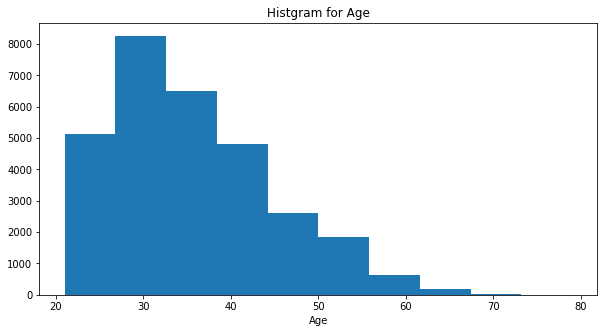

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
ax = plt.subplot(111)
ax.hist(dataset['AGE'])
ax.set_title("Histgram for Age")
ax.set_xlabel('Age')
plt.show()

Text(0.5, 1.0, 'Age for not default Next Month')

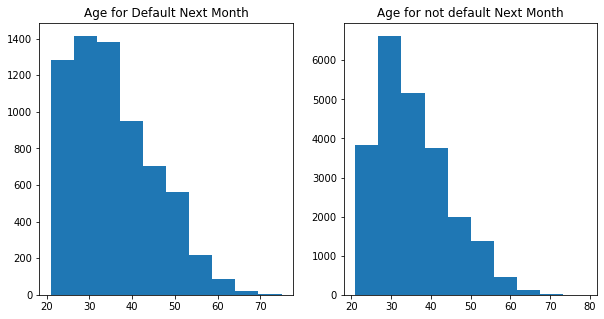

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
Default = dataset[dataset['Default payment']==1]
Not_default = dataset[dataset['Default payment']==0]
fig,axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(Default['AGE'])
axes[0].set_title("Age for Default Next Month")
axes[1].hist(Not_default['AGE'])
axes[1].set_title("Age for not default Next Month")


In [51]:
# Adding a new age column that divide the age (21 to 79) into 6 sections
def get_age_range(age):
    j = 20
    for i in range(6):
        if age < j+10:
            break
        j = j + 10
    return j    

In [52]:
age_range_df=pd.DataFrame(columns=['Age_range','Default payment'])

In [53]:
age_range_df['Age_range']=dataset['AGE'].apply(lambda x:get_age_range(x))

In [54]:
age_range_df['Default payment']=dataset['Default payment']

In [55]:
age_range_df.head(3)

,Age_range,Default payment
0,20,1
1,20,1
2,30,0


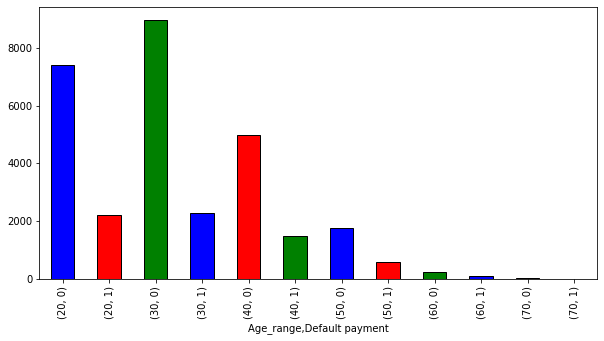

In [56]:
plt.rcParams["figure.figsize"] = (10,5)
age_range_df.groupby('Age_range')['Default payment'].value_counts().plot.bar(edgecolor='black',color=['blue','red','green'])

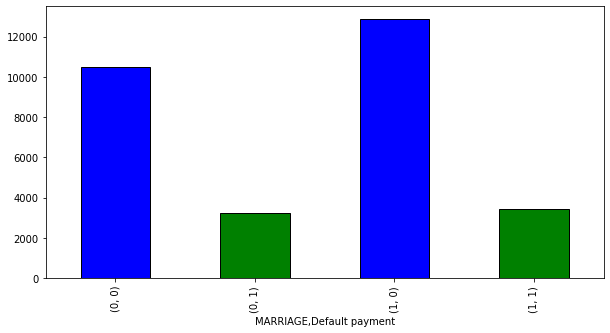

In [ ]:
ax=dataset.groupby('MARRIAGE')['Default payment'].value_counts().plot.bar(edgecolor='black',color=['blue','green'])


In [29]:
#marriage_group = dataset.groupby(['MARRIAGE','Default payment'])
#marriage_group.size().unstack().plot(kind='bar')
#plt.show()

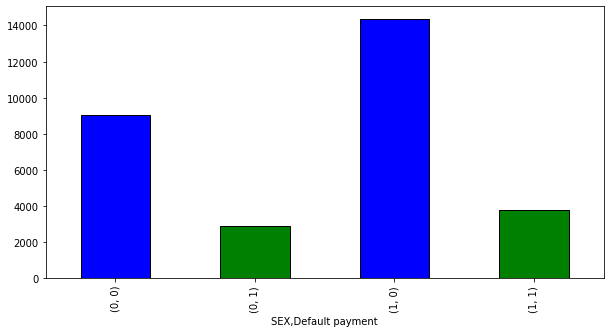

In [30]:
ax=dataset.groupby('SEX')['Default payment'].value_counts().plot.bar(edgecolor='black',color=['blue','green'])


In [57]:
#Removing the unwanted columns.
dataset=dataset.drop(['ID'],axis=1)
dataset.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment,Pending bill
0,20000,2,1,0,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,120000,2,1,1,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,90000,2,1,1,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,92545


## **Machine Learning Model**

In [58]:
x=dataset.drop('Default payment',axis=1)
y=dataset['Default payment']
x.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pending bill
0,20000,2,1,0,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,7704
1,120000,2,1,1,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,17077
2,90000,2,1,1,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,92545


In [61]:
# Let's do the training & testing split of our dataset.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print('Shape of x training dataset:',x_train.shape)
print('Shape of x testing dataset:',x_test.shape)
print('Shape of y training dataset:',y_train.shape)
print('Shape of y testing dataset:',y_test.shape)

Shape of x training dataset: (22500, 24)
Shape of x testing dataset: (7500, 24)
Shape of y training dataset: (22500,)
Shape of y testing dataset: (7500,)


## **Logistic Regression Model**

In [64]:
lg=LogisticRegression(max_iter=10000)
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_pred_train=lg.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.7772888888888889

In [66]:
y_pred_test=lg.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.7830666666666667

From the above we can see that. The accuracy of the Logistic Regression model is not upto mark.

## **Decision Tree**

In [69]:
dt= DecisionTreeClassifier(class_weight="balanced")
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
accuracy_score(y_test,dt.predict(x_test))

0.7388